In [6]:
import csv

# Input and output file paths
input_file_path = r'C:\Users\91742\Desktop\Vavye Mobility\VSCode\ConvertToCSV\Temperature_Sensor_Data.txt'
output_csv_file_path = r'C:\Users\91742\Desktop\Vavye Mobility\VSCode\ConvertToCSV\output.csv'


In [10]:
with open(input_file_path, 'r') as input_file:
    # Read the entire content of the file
    content = input_file.read()


In [12]:
# Split the content into lines using '\n'
readings = content.strip().split('/n')


In [14]:
# Process the data and create a list of tuples
data = []

for reading in readings:
    if not reading.strip():
        continue  # Skip empty readings
    try:
        time, voltage = map(float, reading.split(','))
        data.append((time, voltage))
    except Exception as e:
        print(f"Error processing reading: {reading}\nError: {e}")


In [15]:
# Write data to the output CSV file
with open(output_csv_file_path, 'w', newline='') as output_csv:
    csv_writer = csv.writer(output_csv)
    # Write header if needed
    # csv_writer.writerow(['Time (ms)', 'Voltage (V)'])
    csv_writer.writerows(data)


In [16]:
f"Conversion successful. CSV file created at '{output_csv_file_path}'."


"Conversion successful. CSV file created at 'C:\\Users\\91742\\Desktop\\Vavye Mobility\\VSCode\\ConvertToCSV\\output.csv'."

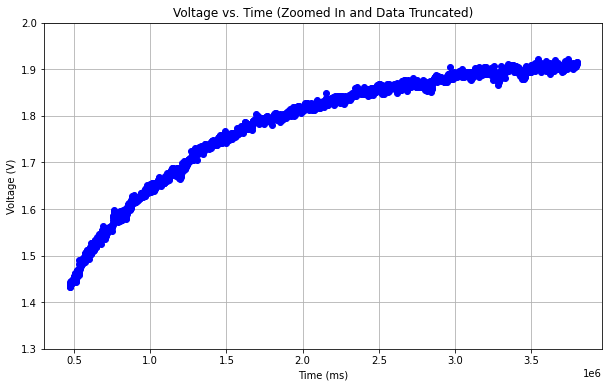

In [19]:
import matplotlib.pyplot as plt

# Extract time and voltage data for plotting
times, voltages = zip(*data)

# Filter data based on time
max_time = 3800000
filtered_data = [(time, voltage) for time, voltage in data if time <= max_time]

# Extract time and voltage data for plotting after filtering
filtered_times, filtered_voltages = zip(*filtered_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(filtered_times, filtered_voltages, marker='o', linestyle='-', color='b')
plt.title('Voltage vs. Time (Zoomed In and Data Truncated)')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.ylim(1.3, 2.0)  # Set the y-axis range
plt.grid(True)
plt.show()


In [20]:
import csv

# Voltage vs. Temperature data
voltage_temperature_data = [
    (1.51, 59),
    (1.52, 58),
    (1.53, 57),
    (1.54, 56),
    (1.56, 55),
    (1.58, 54),
    (1.61, 53),
    (1.62, 52),
    (1.64, 51),
    (1.65, 50),
    (1.68, 49),
    (1.69, 48),
    (1.72, 47),
    (1.73, 46),
    (1.75, 45),
    (1.77, 44),
    (1.79, 43),
    (1.79, 42),
    (1.81, 41),
    (1.82, 40),
    (1.82, 39),
    (1.84, 38),
    (1.85, 36),
    (1.87, 35),
    (1.88, 35),
    (1.89, 33)
]

# Output CSV file path
output_csv_file_path_temperature = r'C:\Users\91742\Desktop\Vavye Mobility\VSCode\ConvertToCSV\temperature_data.csv'

# Write data to the output CSV file
with open(output_csv_file_path_temperature, 'w', newline='') as output_csv_temperature:
    csv_writer_temperature = csv.writer(output_csv_temperature)
    csv_writer_temperature.writerow(['Voltage (V)', 'Temperature (°C)'])
    csv_writer_temperature.writerows(voltage_temperature_data)

f"Temperature data CSV file created at '{output_csv_file_path_temperature}'."


"Temperature data CSV file created at 'C:\\Users\\91742\\Desktop\\Vavye Mobility\\VSCode\\ConvertToCSV\\temperature_data.csv'."

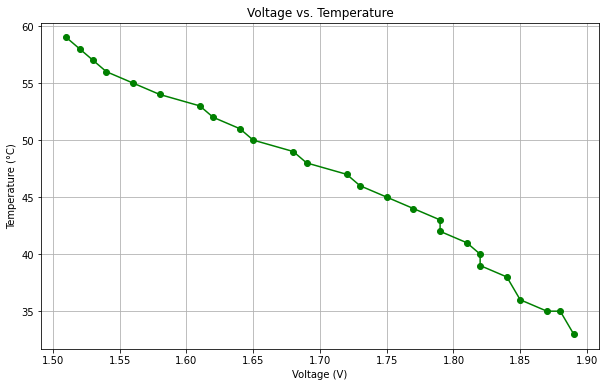

In [22]:
import matplotlib.pyplot as plt

# Read data from the temperature CSV file
with open(output_csv_file_path_temperature, 'r') as input_csv_temperature:
    csv_reader_temperature = csv.reader(input_csv_temperature)
    next(csv_reader_temperature)  # Skip header row
    temperature_data = [(float(row[0]), float(row[1])) for row in csv_reader_temperature]

# Extract voltage and temperature data for plotting
voltages_temperature, temperatures = zip(*temperature_data)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(voltages_temperature, temperatures, marker='o', linestyle='-', color='g')
plt.title('Voltage vs. Temperature')
plt.xlabel('Voltage (V)')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [24]:
from scipy.interpolate import interp1d
import numpy as np

# Provided Voltage vs. Temperature data
voltage_temperature_data = [
    (1.51, 59),
    (1.52, 58),
    (1.53, 57),
    (1.54, 56),
    (1.56, 55),
    (1.58, 54),
    (1.61, 53),
    (1.62, 52),
    (1.64, 51),
    (1.65, 50),
    (1.68, 49),
    (1.69, 48),
    (1.72, 47),
    (1.73, 46),
    (1.75, 45),
    (1.77, 44),
    (1.79, 43),
    (1.79, 42),
    (1.81, 41),
    (1.82, 40),
    (1.82, 39),
    (1.84, 38),
    (1.85, 36),
    (1.87, 35),
    (1.88, 35),
    (1.89, 33)
]

# Extract voltage and temperature data
voltages, temperatures = zip(*voltage_temperature_data)

# Interpolate to find a function (equation) relating voltage to temperature
interp_function = interp1d(voltages, temperatures, kind='linear', fill_value='extrapolate')

# Calculate the coefficients of the interpolation function
coefficients = np.polyfit(voltages, temperatures, deg=4)

# Display the coefficients
coefficients


array([  1289.78801301,  -9160.83019487,  24253.89976964, -28439.16295386,
        12535.517037  ])